In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

In [2]:
#Import CSV
csv = "Sales_Item_Merged.csv"
sales_data = pd.read_csv(csv)
sales_data

,Silo,Silo_Description,Cust_ID,name_cust,id_st,Date_Invoice,id_item,descr_1,qty_ship,price_net,code_cat_prdt,category,flag_stat_item,Unnamed: 13,Item_Add_date
0,I,Industrial,22777,USHER OIL COMPANY,MI,3/18/2019,1000ABS550,ACTIV VIII,8,1750.56,10,AC8000 MOD,A,FNSG,6/12/2015
1,I,Industrial,22777,USHER OIL COMPANY,MI,5/21/2019,1000ABS550,ACTIV VIII,8,1838.08,10,AC8000 MOD,A,FNSG,6/12/2015
2,I,Industrial,22777,USHER OIL COMPANY,MI,2/11/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG,6/12/2015
3,I,Industrial,22777,USHER OIL COMPANY,MI,4/6/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG,6/12/2015
4,I,Industrial,22777,USHER OIL COMPANY,MI,8/19/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG,6/12/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23367,I,Industrial,1801,MSP INDUSTRIES,MI,9/27/2019,ZS401,BRUSH-SPIRAL WRAP SCRUB BRUSH,2,1139.50,ZS,PDQ PARTS,A,FNSG,9/24/2019
23368,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS402,BRUSH-HI DENSITY SCRUB BRUSH,2,822.50,ZS,PDQ PARTS,A,FNSG,10/11/2019
23369,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS403,BRUSH-SIDE SCRUB BRUSH,1,207.00,ZS,PDQ PARTS,A,FNSG,10/11/2019
23370,I,Industrial,12663,"LIBERTY STEEL INDUSTRIES, INC.",OH,10/24/2019,ZS404,BRUSH-GRIT SIDE SCRUB BRUSH.,1,469.00,ZS,PDQ PARTS,A,FNSG,10/14/2019


In [3]:
sales_data['year'] = pd.DatetimeIndex(sales_data['Date_Invoice']).year.astype(object)
sales_data

,Silo,Silo_Description,Cust_ID,name_cust,id_st,Date_Invoice,id_item,descr_1,qty_ship,price_net,code_cat_prdt,category,flag_stat_item,Unnamed: 13,Item_Add_date,year
0,I,Industrial,22777,USHER OIL COMPANY,MI,3/18/2019,1000ABS550,ACTIV VIII,8,1750.56,10,AC8000 MOD,A,FNSG,6/12/2015,2019
1,I,Industrial,22777,USHER OIL COMPANY,MI,5/21/2019,1000ABS550,ACTIV VIII,8,1838.08,10,AC8000 MOD,A,FNSG,6/12/2015,2019
2,I,Industrial,22777,USHER OIL COMPANY,MI,2/11/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG,6/12/2015,2020
3,I,Industrial,22777,USHER OIL COMPANY,MI,4/6/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG,6/12/2015,2020
4,I,Industrial,22777,USHER OIL COMPANY,MI,8/19/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG,6/12/2015,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23367,I,Industrial,1801,MSP INDUSTRIES,MI,9/27/2019,ZS401,BRUSH-SPIRAL WRAP SCRUB BRUSH,2,1139.50,ZS,PDQ PARTS,A,FNSG,9/24/2019,2019
23368,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS402,BRUSH-HI DENSITY SCRUB BRUSH,2,822.50,ZS,PDQ PARTS,A,FNSG,10/11/2019,2019
23369,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS403,BRUSH-SIDE SCRUB BRUSH,1,207.00,ZS,PDQ PARTS,A,FNSG,10/11/2019,2019
23370,I,Industrial,12663,"LIBERTY STEEL INDUSTRIES, INC.",OH,10/24/2019,ZS404,BRUSH-GRIT SIDE SCRUB BRUSH.,1,469.00,ZS,PDQ PARTS,A,FNSG,10/14/2019,2019


In [4]:
twenty_19_sales = sales_data.loc[sales_data['year']== 2019]
twenty_20_sales = sales_data.loc[sales_data['year']== 2020]
twenty_19_sales

,Silo,Silo_Description,Cust_ID,name_cust,id_st,Date_Invoice,id_item,descr_1,qty_ship,price_net,code_cat_prdt,category,flag_stat_item,Unnamed: 13,Item_Add_date,year
0,I,Industrial,22777,USHER OIL COMPANY,MI,3/18/2019,1000ABS550,ACTIV VIII,8,1750.56,10,AC8000 MOD,A,FNSG,6/12/2015,2019
1,I,Industrial,22777,USHER OIL COMPANY,MI,5/21/2019,1000ABS550,ACTIV VIII,8,1838.08,10,AC8000 MOD,A,FNSG,6/12/2015,2019
9,C,Contract,20930,CHARLOTTE PRODUCTS LTD.,IL,10/4/2019,1000CUS026,SAFE CLEAN 319000-18,26,487.76,10,AC8000 MOD,A,FNSG,1/19/2015,2019
10,C,Contract,20930,CHARLOTTE PRODUCTS LTD.,IL,3/4/2019,1000CUS026,SAFE CLEAN 319000-18,25,463.00,10,AC8000 MOD,A,FNSG,1/19/2015,2019
13,I,Industrial,16630,"ADREM,INC.",MI,4/25/2019,1000OID550,CLEAN EASE,8,1845.68,10,AC8000 MOD,A,FNSG,12/30/1994,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23366,I,Industrial,12663,"LIBERTY STEEL INDUSTRIES, INC.",OH,9/23/2019,ZS400,BRUSH-SPIRAL WRAP GRIT BRUSH,2,1338.00,ZS,PDQ PARTS,A,FNSG,8/19/2019,2019
23367,I,Industrial,1801,MSP INDUSTRIES,MI,9/27/2019,ZS401,BRUSH-SPIRAL WRAP SCRUB BRUSH,2,1139.50,ZS,PDQ PARTS,A,FNSG,9/24/2019,2019
23368,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS402,BRUSH-HI DENSITY SCRUB BRUSH,2,822.50,ZS,PDQ PARTS,A,FNSG,10/11/2019,2019
23369,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS403,BRUSH-SIDE SCRUB BRUSH,1,207.00,ZS,PDQ PARTS,A,FNSG,10/11/2019,2019


In [5]:
category_sales_2019 = twenty_19_sales.groupby(['category']).sum().rename(index={'NOACIDCOIL': 'Coil Cleaner', 
                                        'AG-MISC.':'Agricultural Products',
                                        'EPA - MISC' : 'Disinfectant',
                                        'NON8000MOD' : 'Multipurpose Cleaner', 
                                        'AC8000 HD' : 'Degreaser', 
                                        'MISC SPEC': 'Food Sanitation',
                                        'EPA-QT>8.1': "Quat Disinfectant",
                                        "AIRX PROD": "Odor Counteractives", 
                                        'LUBRICANTS' : 'Lubricants',
                                        'NONMFG R/M' : 'Raw Material',
                                        'EUROPRO' : 'Private Label EUP',
                                        'KARCHER' : 'Private Label KNA '
                                       })
category_sales_2020 = twenty_20_sales.groupby(['category']).sum().rename(index={'NOACIDCOIL': 'Coil Cleaner', 
                                        'AG-MISC.':'Agricultural Products',
                                        'EPA - MISC' : 'Disinfectant',
                                        'NON8000MOD' : 'Multipurpose Cleaner', 
                                        'AC8000 HD' : 'Degreaser', 
                                        'MISC SPEC': 'Food Sanitation',
                                        'EPA-QT>8.1': "Quat Disinfectant",
                                        "AIRX PROD": "Odor Counteractives", 
                                        'LUBRICANTS' : 'Lubricants',
                                        'NONMFG R/M' : 'Raw Material',
                                        'EUROPRO' : 'Private Label EUP',
                                        'KARCHER' : 'Private Label KNA '
                                       })
category_sales_2019.sort_values(by = 'price_net', ascending = False).head(10)

,qty_ship,price_net
category,,
Coil Cleaner,342437,6126189.87
Agricultural Products,863460,2478971.51
Disinfectant,269061,2133664.48
NuFiber,859254,1301721.26
Multipurpose Cleaner,15259,992984.54
Degreaser,14285,871860.25
Food Sanitation,9079,786591.38
Lubricants,40834,763723.17
Quat Disinfectant,32848,706017.55


In [6]:
twenty19_cat = len(category_sales_2019)
twenty20_cat = len(category_sales_2020)
twenty19_high = category_sales_2019['qty_ship'].max()
twenty20_high = category_sales_2020['qty_ship'].max()

In [8]:
top_ten_2019 = category_sales_2019.sort_values(by = 'price_net', ascending = False)
top_ten_2020 = category_sales_2020.sort_values(by = 'price_net', ascending = False)
twenty19_labels = top_ten_2019.head(10).index
twenty20_labels = top_ten_2020.head(10).index
print(twenty19_labels)
print(twenty20_labels)

Index(['Coil Cleaner', 'Agricultural Products', 'Disinfectant', 'NuFiber',
       'Multipurpose Cleaner', 'Degreaser', 'Food Sanitation', 'Lubricants',
       'Quat Disinfectant', 'Raw Material'],
      dtype='object', name='category')
Index(['Coil Cleaner', 'Private Label EUP', 'Disinfectant',
       'Odor Counteractives', 'Private Label KNA ', 'Agricultural Products',
       'Quat Disinfectant', 'NuFiber', 'Multipurpose Cleaner', 'Lubricants'],
      dtype='object', name='category')


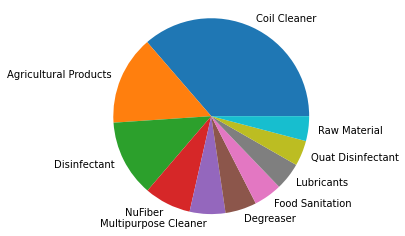

In [9]:
plt.pie(top_ten_2019['price_net'].head(10), labels = twenty19_labels)
plt.axis("equal")
plt.show()

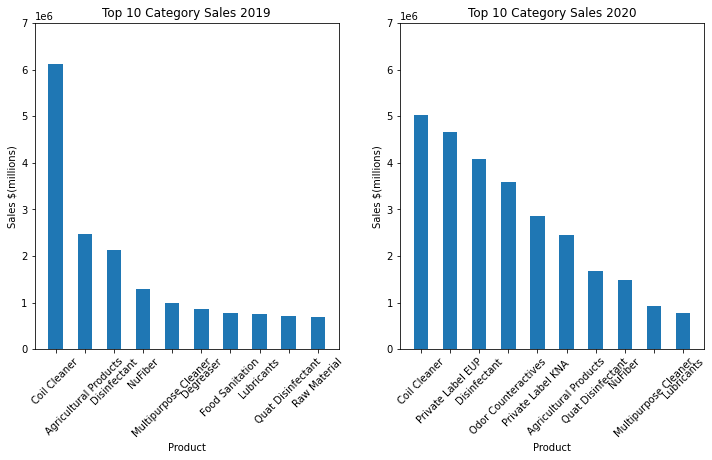

In [10]:
plt.subplots(1,2, figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(height = top_ten_2019['price_net'].head(10), x = twenty19_labels, width = .5)
plt.ylabel('Sales $(millions)')
plt.ylim(0,7000000)
plt.xlabel('Product')
plt.xticks(rotation =45)
plt.title('Top 10 Category Sales 2019')
plt.subplot(1,2,2)
plt.bar(height = top_ten_2020['price_net'].head(10), x = twenty20_labels, width = .5)
plt.ylabel('Sales $(millions)')
plt.ylim(0,7000000)
plt.xlabel('Product')
plt.xticks(rotation =45)
plt.title('Top 10 Category Sales 2020')
plt.savefig('output/Top 10 Category Sales Comparison by Dollar Amount')
plt.show()

In [11]:
top_ten_2019_qty = category_sales_2019.sort_values(by = 'qty_ship', ascending = False)
top_ten_2020_qty = category_sales_2020.sort_values(by = 'qty_ship', ascending = False)
twenty19_qty_labels = top_ten_2019_qty.head(10).index
twenty20_qty_labels = top_ten_2020_qty.head(10).index

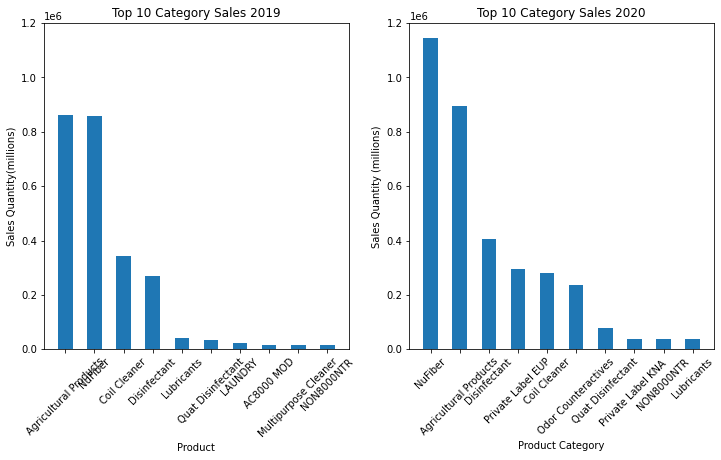

In [12]:
plt.subplots(1,2, figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(height = top_ten_2019_qty['qty_ship'].head(10), x = twenty19_qty_labels, width = .5)
plt.ylabel('Sales Quantity(millions)')
plt.ylim(0,1200000)
plt.xlabel('Product')
plt.xticks(rotation =45)
plt.title('Top 10 Category Sales 2019')
plt.subplot(1,2,2)
plt.bar(height = top_ten_2020_qty['qty_ship'].head(10), x = twenty20_qty_labels, width = .5)
plt.ylabel('Sales Quantity (millions)')
plt.ylim(0,1200000)
plt.xlabel('Product Category')
plt.xticks(rotation =45)
plt.title('Top 10 Category Sales 2020')
plt.savefig('output/Top 10 Category Sales Comparison by Quantity', facecolor = 'w')
plt.show()

In [13]:
merged_data = pd.merge(top_ten_2019.head(10), top_ten_2020.head(10), 
                       how='outer', on = 'category', suffixes=("_2019", "_2020")).fillna(0)
merged_data

,qty_ship_2019,price_net_2019,qty_ship_2020,price_net_2020
category,,,,
Coil Cleaner,342437.0,6126189.87,280145.0,5026442.83
Agricultural Products,863460.0,2478971.51,893319.0,2447799.98
Disinfectant,269061.0,2133664.48,406492.0,4087757.98
NuFiber,859254.0,1301721.26,1143945.0,1485940.81
Multipurpose Cleaner,15259.0,992984.54,18376.0,935628.42
Degreaser,14285.0,871860.25,0.0,0.00
Food Sanitation,9079.0,786591.38,0.0,0.00
Lubricants,40834.0,763723.17,36351.0,779482.56
Quat Disinfectant,32848.0,706017.55,76638.0,1674985.47


In [14]:
xlabels = merged_data.reset_index(drop=False)
labels=xlabels['category']
twenty_19 = merged_data['qty_ship_2019'].to_numpy()
twenty_20 = merged_data['qty_ship_2020'].to_numpy()

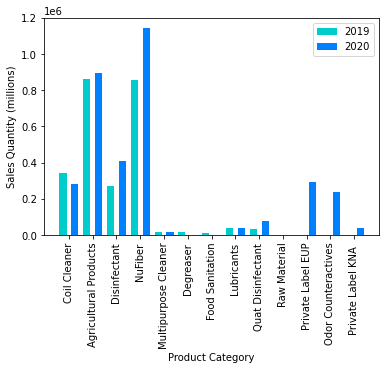

In [23]:
x = np.arange(len(xlabels))
w=.5
plt.bar(x, height = merged_data['qty_ship_2019'], width=.3, color = '#00CCCC')
plt.bar(x+w, height = merged_data['qty_ship_2020'], width = .3, color = '#0080FF')
plt.xticks([i+w/2 for i in range(len(x))], labels, rotation=90)
plt.legend(loc="upper right", labels=['2019', '2020'])
plt.ylabel('Sales Quantity (millions)')
plt.xlabel('Product Category')
plt.savefig('output/Top 10 Category Sales Comparison by Quantity - dual', facecolor='w', bbox_inches='tight')
plt.show()

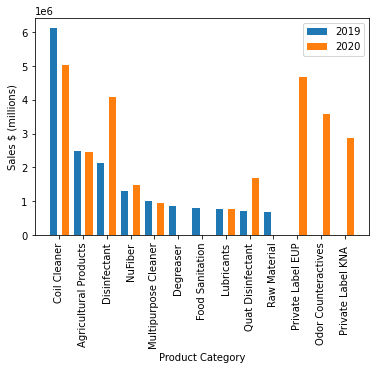

In [16]:
plt.bar(x, height = merged_data['price_net_2019'], width=.3, color = '#00CCCC')
plt.bar(x+w, height = merged_data['price_net_2020'], width = .3, color = '#0080FF')
plt.xticks([i+w/2 for i in range(len(x))], labels, rotation=90)
plt.legend(loc="upper right", labels=['2019', '2020'])
plt.ylabel('Sales $ (millions)')
plt.xlabel('Product Category')
plt.savefig('output/Top 10 Category Sales Comparison by Dollar Amount - dual',facecolor='w', bbox_inches='tight')
plt.show()